<a href="https://colab.research.google.com/github/wespitia9/Clasificaci-n-de-im-genes-con-redes-neuronales-convolucionales-CNN-/blob/main/Clasificaci%C3%B3n_de_im%C3%A1genes_con_redes_neuronales_convolucionales_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de imágenes con redes neuronales convolucionales (CNN)

Las redes consisten en múltiples capas de colecciones de neuronas las cuales procesan una porción de la imagen de entrada, esas capas se llaman: **campos receptivos**.

Las salidas de esas colecciones de neuronas se superponen en las regiones de entrada para obtener una representación adecuada de la imagen original; este proceso se repite en cada capa.

## Arquitectura CNN

<img src="https://i0.wp.com/developersbreach.com/wp-content/uploads/2020/08/cnn_banner.png">


# Capa convolucional

La principal caracteristica de las redes neuronales tradicionales es que las neuronas están conectadas todas con todas. Por ejemplo si tenemos imagenes de 28x28 pixeles en escala de grises, tendremos 784 neuronas (28x28x1) en una capa lo que parece ser manejable. Sin embargo, muchas de las imágenes tienen más pixeles y tienen 3 canales de colores (R,G,B), por ejemplo, asumiendo que se tiene un conjunto de imágenes a color en formato 4K Ultra HD, se tendrian 26,542,080 (4096x2160x3) conexiones de neuronas sólo en la primera capa !!!.

Debido a la alta densidad de conexiones, las redes tradicionales no son  escalables para manejar imágenes, debido a que no mantienen información sobre alguna correlación espacial que existen en las imágenes ya que los bits de las imagenes se ponen planos en una larga fila. 

Para mantener la relación que tienen los pixeles en el espacio, se proponen las capas convolucionales y _pooling_.

<img src="https://theano-pymc.readthedocs.io/en/latest/_images/padding_strides_odd.gif" width="50%">

**Referencia**: [http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html](http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html)

### Filtros Convolucionales
Debido al hecho que los pixeles están relacinados con los pixeles cercanos adyacentes, la convolución permite conservar la relación espacial entre las diferentes partes de la imagen y eso es información valiosa para la red, asi como para nuestro cerebro que decodifica imagenes de acuerdo a la ubicación relativa de un elemento respecto a otro.

La convolución es básicamente un filtro de una imagen con con una pequeña matriz llamada _kernel_. Por ejemplo si se aplica una convolución a una imágen de 5x5 utilizando un filtro de 3x3, se obtiene como resultado una salida de 3x3 (Reduciendo la complejidad en un 64%). Estos _kernels_ o filtros contienen los pesos que la red aprende en su proceso de entrenamiento.


<img src="https://cdn-images-1.medium.com/max/800/1*V7YGj0ZWil9V-i0k74QVSQ.png">

## Capa _Pooling_

Cuando se construllen redes neuronales es común insrtar capas _pooling_ después de cada capa convolucional, su función principal es reducir el tamaño espacial de la representación (ejerce una función de compresión) y esto ayuda a reducir la capacidad computacional de las capas siguientes, adicionalmente estas capas ayudan a resolver el problema de sobre-entrenamiento.

La capa más común se conoce como: **Max Pooling**, de cada subconjunto simplemente extrae el máximo.

<img src="https://cdn-images-1.medium.com/max/800/1*oVOUhBIi59Gb5w7eBzqYuA.png">

## Función de Activación ReLU (Rectified Linear Units) 

Después de cada capa convolucional se realiza una operación no lineal definida como **capa de activación**. El propósito de esta capa es introducir una no linealidad en la red, anteriormente se utilizaban funciones como _sigmoid_ o _tanh_, pero los investigadores encontraron que la activación ReLU funciona mejor debido a que la red es capaz de entrenarse más rápido por la simplicidad operacional de esta fucnión de activación sin impactar sifnificativamente la precisión.

La función **ReLu** es definida como $f(x) = \max(0, x)$,
Referencia: http://www.cs.toronto.edu/~fritz/absps/reluICML.pdf 

## Capa _Dropout_

_Dropout_ es una técnica para reducir el sobre-entrenamiento que consiste en aleatoreamente desactivar neuronas en cada iteración del entrenamiento. No se utiliza para predecir, sólo para entrenar.

## Capa completamente conectada (FC)

Las últimas capas de la red, se conocen como: **Fully Connected Layer**, consiste en una red neuronal tradicional cuyas entradas son características de alto nivel que contienen las interpretaciones de las imagenes mas incidentes para determinar una clase particular.

<img src="https://cdn-images-1.medium.com/max/800/1*jYc7Hq9dU4kHXqm_Yd6vmw.png" />

Ahora que se tiene idea de cada una de los componentes de una red neuronal convolucional, se muestra a continuación un ejemplo de una arquitectura de red:

<img src="https://cdn-images-1.medium.com/max/800/1*5A4b1qOZIr4Q6SKceqGn7w.jpeg" />

Para profundizar y tener entendimiento de como funciona la convolución y otros detalles omitidos en esta breve presentación, se sugiere leer este artículo: [A guide to convolution arithmetic for deep learning](https://arxiv.org/abs/1603.07285).

Adicionalmente se sugiere revisar este tutorial para profundizar conceptos: [convnet tutorial](http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html)

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

## Cargar el conjunto de datos de MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test_orig = x_test

In [ ]:
x_test.shape

(10000, 28, 28)

## Vamos a preparar el conjunto de datos

In [ ]:
num_classes = 10
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
y_train[1] #Marcado de etiqueta en aprendizaje supervisado

0

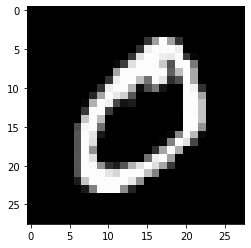

In [ ]:
plt.imshow(x_train[1,:,:,0], cmap='gray')

## Vamos a visualizar el conjunto de entrenamiento

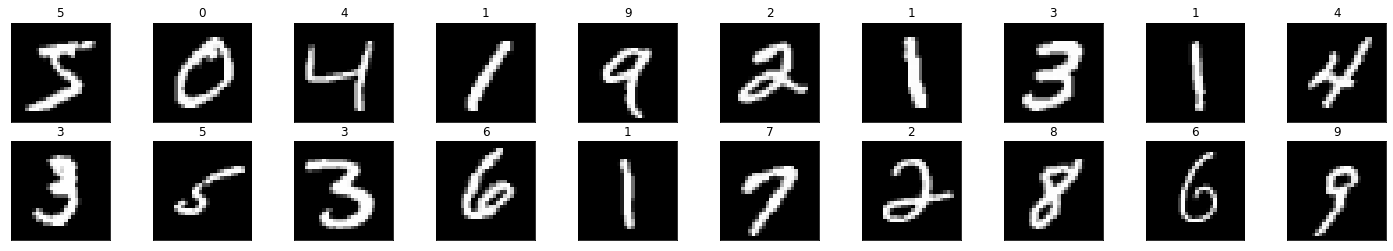

In [ ]:
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[idx,:,:,:]), cmap='gray')
    ax.set_title(str(y_train[idx].item()))

## Vamos a realizar una codificación conocida como onehot

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

## Vamos a definir la red neuronal convolucional

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3,), activation='relu', input_shape= (28,28,1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

## Vamos a entrenar el modelo

In [ ]:
hist = model.fit(x_train, y_train, batch_size = 128, epochs = 60, verbose = 1, validation_data=(x_test, y_test))

Epoch 1/60
469/469 [==============================] - 7s 10ms/step - loss: 0.2212 - accuracy: 0.9340 - val_loss: 0.0473 - val_accuracy: 0.9841
Epoch 2/60
469/469 [==============================] - 4s 9ms/step - loss: 0.0786 - accuracy: 0.9761 - val_loss: 0.0364 - val_accuracy: 0.9881
Epoch 3/60
469/469 [==============================] - 4s 10ms/step - loss: 0.0601 - accuracy: 0.9816 - val_loss: 0.0314 - val_accuracy: 0.9892
Epoch 4/60
469/469 [==============================] - 4s 10ms/step - loss: 0.0478 - accuracy: 0.9854 - val_loss: 0.0307 - val_accuracy: 0.9897
Epoch 5/60
469/469 [==============================] - 4s 9ms/step - loss: 0.0429 - accuracy: 0.9865 - val_loss: 0.0300 - val_accuracy: 0.9902
Epoch 6/60
469/469 [==============================] - 4s 9ms/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0270 - val_accuracy: 0.9912
Epoch 7/60
469/469 [==============================] - 4s 9ms/step - loss: 0.0323 - accuracy: 0.9895 - val_loss: 0.0273 - val_accuracy: 0.9908
Epo

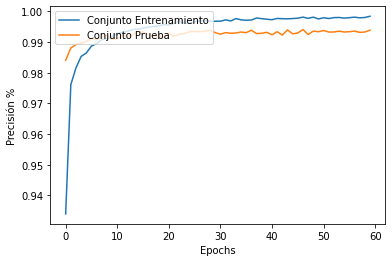

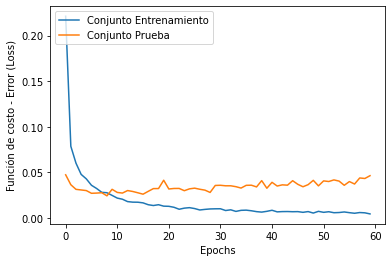

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Precisión %')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Conjunto Entrenamiento', 'Conjunto Prueba'], loc='upper left')

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Función de costo - Error (Loss)')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Conjunto Entrenamiento', 'Conjunto Prueba'], loc='upper left')

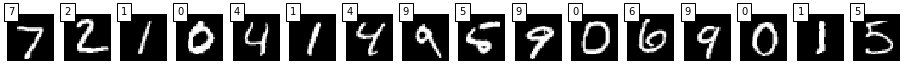

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x_test.shape
slice = 16
predicted = model.predict(x_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(x_test_orig[i], interpolation='nearest', cmap='gray')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

In [ ]:
import cv2
from PIL import Image
import urllib.request




In [ ]:
imagen = Image.open('prueba.jpg')

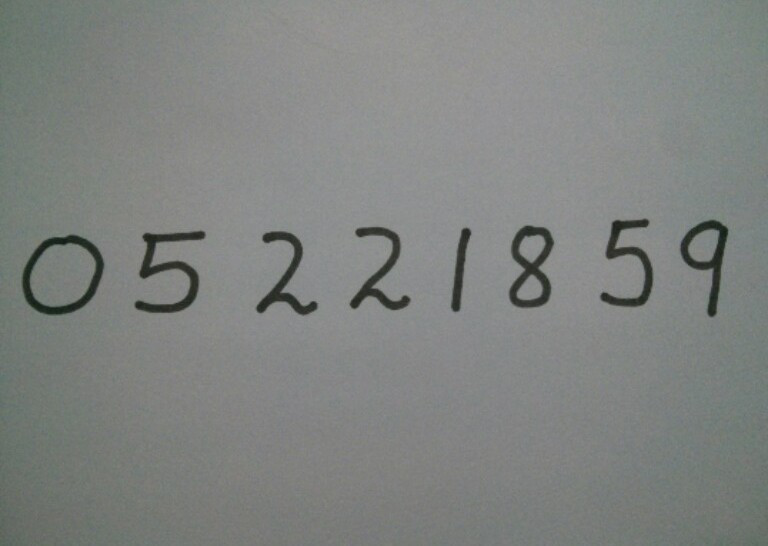

In [ ]:
url = 'https://gadgethero.in/wp-content/uploads/2021/05/digit-reco-1-in.jpg'
im_url = Image.open(urllib.request.urlopen(url))
im = np.asarray(im_url)
im_url

In [ ]:
im = np.array(imagen)

NameError: ignored

In [ ]:
imagen

In [ ]:
# convertir a escala de grises y aplicar filtro gausiano
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)

#aplicar umbral 
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

# encontrar contornos de la imagen
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# obtener rectangulos que contienen cada contorno
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

for rect in rects:
    #dibujar contornos
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # hacer una región rectangular alrededor del digito
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[np.abs(pt1):np.abs(pt1)+leng, np.abs(pt2):np.abs(pt2)+leng]
    # redimensionar la imagen
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    
    roi = roi.astype('float32')
    roi = roi/255
    roi= roi.reshape(1, 28, 28, 1)
        
    pred=model.predict(roi)
    pred=pred.squeeze()
    num_prob = pred.max()
    num=int(np.where(pred==num_prob)[0])
 
    cv2.putText(im, str(num), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 2)
    font = cv2.FONT_HERSHEY_COMPLEX_SMALL
    cv2.putText(im,str(round(num_prob*100))+'%',(rect[0]+25, rect[1]), font, 1,(175,175,175),1)

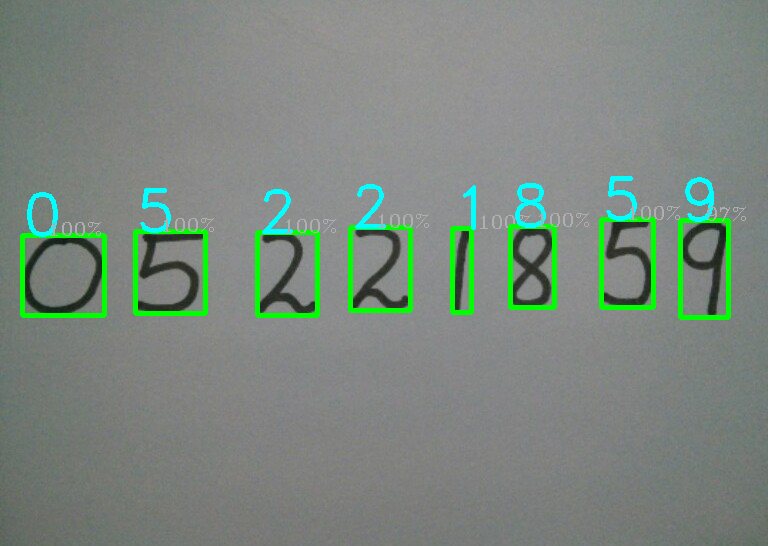

In [ ]:
nim = Image.fromarray(im)
nim